In [ ]:
# 安装opencv-python
!pip install opencv-python

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### 图片的读取与显示

In [ ]:
image_dir = './png_files/0-3/'  # 存储着实验用图的根目录
cv2.namedWindow("PNG Pictures", 0)   # 打开一个可以自由调节大小的cv2窗口，稍后用作显示图片

for image_name in os.listdir(image_dir):   # os.listdir()可以列出在image_dir下所有文件的名字
    
    if not image_name.endswith('.png'):   # 如果取到的文件名不是以'.png'为结尾的，则跳过这次循环，也就是说我们不显示'.png'以外的图像
        continue
    
    image_path = os.path.join( image_dir, image_name )   # 使用os.path.join()可以将两个路径真正地拼接在一起
    image = cv2.imread(image_path, 0)   # 使用cv2.imread()将图片读入，输入是图片的相对路径，第二个参数0代表读入时，为单通道模式
    
    cv2.imshow("PNG Pictures", image)   # 展示图片
    cv2.waitKey(0)   # cv2.imshow()要搭配cv2.waitKey()使用，其中cv2.waitKey()的入参取决于我们的图片可以展示多久，为0的话代表无限，可按任意键跳出cv2.waitKey(0)
cv2.destroyAllWindows()

### 图片的直方图计算 & 直方图均衡

<Figure size 640x480 with 0 Axes>

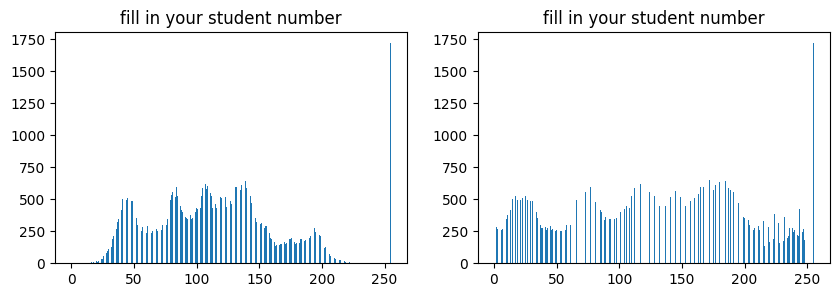

In [ ]:
# 直方图计算函数
def GetHist(img):
    img = img.flatten()
    img = img.tolist()
    hist = []
    for i in range(0,256):
        hist.append(img.count(i))
    return hist

# 直方图均衡
image_path = './png_files/2/Pulse_Noised_Image.png'
cv2.namedWindow("Hist-Equalized Pictures", 0)


    
plt.clf()


image = cv2.imread(image_path, 0)
image_hist = GetHist(image)

equ = cv2.equalizeHist(image)
equ_hist = GetHist(equ)

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.bar(x=range(0, 256), height=image_hist, width=0.5)
plt.title('fill in your student number')
plt.subplot(122)
plt.bar(x=range(0, 256), height=equ_hist, width=0.5)
plt.title('fill in your student number')
plt.show()

cv2.imshow("Hist-Equalized Pictures", equ)

cv2.waitKey(0)

plt.ioff()

cv2.destroyAllWindows()

### 均值滤波 & 高斯滤波 & 中值滤波

In [ ]:
# 均值滤波 & 高斯滤波 & 中值滤波
image_dir = './png_files/4/'
cv2.namedWindow("Mean filtered", 0)
cv2.namedWindow("Gaussian filtered", 0)
cv2.namedWindow("Median filtered", 0)

image_name = os.listdir(image_dir)[0]
image_path = os.path.join(image_dir, image_name)

image = cv2.imread(image_path, 0)

image_mean_filtered = cv2.blur(image, (3,3))
image_gaussian_filtered = cv2.GaussianBlur(image, (3,3), 0)
image_median_filtered = cv2.medianBlur(image, 5)

cv2.imshow("Mean filtered", image_mean_filtered)
cv2.imshow("Gaussian filtered", image_gaussian_filtered)
cv2.imshow("Median filtered", image_median_filtered)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 边缘提取：sobel & laplacian 算子

In [5]:
# sobel
image_dir = './png_files/4/'

cv2.namedWindow("original", 0)
cv2.namedWindow("sobel x", 0)
cv2.namedWindow("sobel y", 0)

image_name = os.listdir(image_dir)[0]
image_path = os.path.join(image_dir, image_name)

image = cv2.imread(image_path, 0)

x = cv2.Sobel(image, -1, 1, 0)
y = cv2.Sobel(image, -1, 0, 1)

absx = cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)

cv2.imshow("original", image)
cv2.imshow("sobel x", absx)
cv2.imshow("sobel y", absy)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# laplacian
image_dir = './png_files/4/'

cv2.namedWindow("original", 0)
cv2.namedWindow("laplacian", 0)

image_name = os.listdir(image_dir)[0]
image_path = os.path.join(image_dir, image_name)

image = cv2.imread(image_path, 0)

laplacian = cv2.Laplacian(image, -1, ksize = 3)
dst = cv2.convertScaleAbs(laplacian)

cv2.imshow("original", image)
cv2.imshow("laplacian", laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学腐蚀 & 形态学膨胀

In [2]:
# 形态学腐蚀
image_path = './png_files/3/1.png'

cv2.namedWindow("original", 0)
cv2.namedWindow("eroded", 0)

image = cv2.imread(image_path, 0)

kernel = np.ones((3,3),np.uint8) 

erosion = cv2.erode(image, kernel, iterations = 1)   #iteration的值越高，模糊程度(腐蚀程度)就越高 呈正相关关系且只能是整数

cv2.imshow("original", image)
cv2.imshow("eroded", erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 形态学膨胀
image_path = './png_files/5/1.png'

cv2.namedWindow("original", 0)
cv2.namedWindow("dilated", 0)

image = cv2.imread(image_path, 0)

kernel = np.ones((3,3),np.uint8) 

dilate = cv2.dilate(image, kernel, iterations=1)  

cv2.imshow("original", image)
cv2.imshow("dilated", dilate)

cv2.waitKey(0)
cv2.destroyAllWindows()